- #### Read file .csv .json .excel ....
- #### Merge dataframe
- #### Delete null/duplicate value
- #### Write file to .csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_excel = pd.read_excel("netflix_titles.xls") # pip install openpyxl
df_json = pd.read_json("netflix_titles.json")

In [3]:
df_sale_1 = pd.read_csv("sales_1.csv")
df_sale_2 = pd.read_csv("sales_2.csv")
df_sale_3 = pd.read_csv("sales_3.csv")

In [4]:
frames = [df_sale_1, df_sale_2, df_sale_3]
merger_df = pd.concat(frames)

In [5]:
print(len(df_sale_1), len(df_sale_2), len(df_sale_3))
print(len(df_sale_1) + len(df_sale_2) + len(df_sale_3))
print(len(merger_df))

9723 12036 15226
36985
36985


In [6]:
df = merger_df[merger_df["Order ID"] == "Order ID"]
df.count()

Order ID            69
Product             69
Quantity Ordered    69
Price Each          69
Order Date          69
Purchase Address    69
dtype: int64

In [7]:
merger_df = merger_df[merger_df["Order ID"] != "Order ID"] 

In [8]:
merger_df.isna().sum()
df = merger_df[merger_df.isna()]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
merger_df.dropna(subset=["Order ID"], inplace=True)
merger_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
merger_df.to_csv("sales_1_2_3.csv", index=False)

### Info of dataframe

In [11]:
merger_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,36821,36821,36821,36821,36821,36821
unique,35324,19,7,18,29485,33642
top,160873,USB-C Charging Cable,1,11.95,02/10/19 13:22,"702 River St, San Francisco, CA 94016"
freq,5,4455,33437,4455,6,5


In [12]:
merger_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          36821 non-null  object
 1   Product           36821 non-null  object
 2   Quantity Ordered  36821 non-null  object
 3   Price Each        36821 non-null  object
 4   Order Date        36821 non-null  object
 5   Purchase Address  36821 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [13]:
merger_df.shape

(36821, 6)

In [14]:
merger_df.nunique()

Order ID            35324
Product                19
Quantity Ordered        7
Price Each             18
Order Date          29485
Purchase Address    33642
dtype: int64

In [15]:
merger_df["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

- #### Convert type
- #### Add / pop / insert column
- #### Group value

In [16]:
merger_df.dtypes
merger_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [17]:
merger_df["Order ID"] = pd.to_numeric(merger_df["Order ID"], downcast = 'integer')
merger_df["Quantity Ordered"] = pd.to_numeric(merger_df["Quantity Ordered"], downcast = 'integer')
merger_df["Price Each"] = pd.to_numeric(merger_df["Price Each"], downcast = 'float')
merger_df["Order Date"] = pd.to_datetime(merger_df["Order Date"])
merger_df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered              int8
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [18]:
merger_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [19]:
merger_df["Sum"] = merger_df["Quantity Ordered"] * merger_df["Price Each"]
merger_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sum
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990005
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000


In [20]:
moving_column = merger_df.pop("Sum")
merger_df.insert(4, "Sum", moving_column)
merger_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sum,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [21]:
print(merger_df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sum',
       'Order Date', 'Purchase Address'],
      dtype='object')


### Data cleaning, Outliers, Duplicates 

In [22]:
merger_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sum,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [23]:
merger_df.nunique()

Order ID            35324
Product                19
Quantity Ordered        7
Price Each             17
Sum                    45
Order Date          29485
Purchase Address    33642
dtype: int64

In [24]:
merger_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Sum                 0
Order Date          0
Purchase Address    0
dtype: int64

In [25]:
newdf = merger_df.drop(['Price Each'], axis='columns')
newdf 

,Order ID,Product,Quantity Ordered,Sum,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.950000,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.990005,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,8.970000,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700.000000,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016"


In [26]:
newdf["Product"].fillna('No data product', inplace=True)
newdf["Purchase Address"].fillna('No data product', inplace=True)

newdf.dropna(subset=['Order ID', 'Sum', 'Order Date'], inplace=True)

In [27]:
ndf = newdf[["Order ID", "Sum"]].copy()
ndf = ndf.groupby("Order ID").sum()
ndf

,Sum
Order ID,
141234,700.000000
141235,14.950000
141236,23.980000
141237,149.990005
141238,11.990000
...,...
176553,11.950000
176554,14.950000
176555,149.990005


In [28]:
min_q, max_q = ndf["Sum"].quantile([0.02, 0.98])
min_q, max_q

(2.990000009536743, 1700.0)

(array([2.6987e+04, 3.7840e+03, 2.6800e+03, 1.2000e+02, 8.4800e+02,
        1.1000e+01, 1.0000e+00, 8.8800e+02, 4.0000e+00, 1.0000e+00]),
 array([   2.99000001,  242.69099426,  482.39199829,  722.09301758,
         961.79400635, 1201.49499512, 1441.19604492, 1680.89697266,
        1920.59802246, 2160.29907227, 2400.        ]),
 <BarContainer object of 10 artists>)

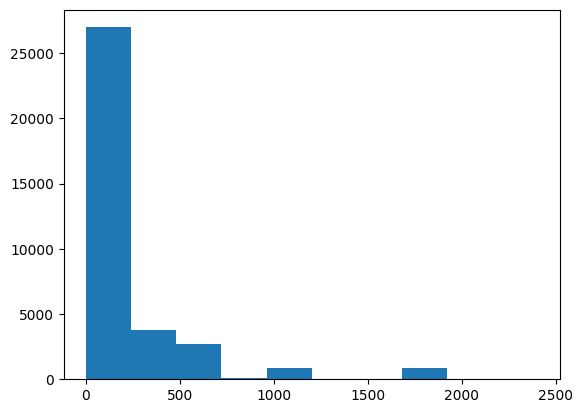

In [29]:
import matplotlib.pyplot as plt

plt.hist(ndf["Sum"])

In [30]:
ndf = ndf[~(ndf["Sum"]>max_q) | (ndf["Sum"]<min_q)]
ndf 

,Sum
Order ID,
141234,700.000000
141235,14.950000
141236,23.980000
141237,149.990005
141238,11.990000
...,...
176553,11.950000
176554,14.950000
176555,149.990005


In [31]:
ndf = newdf[["Order ID", "Sum"]].copy()
ndf = ndf.groupby("Order ID").sum()
ndf

,Sum
Order ID,
141234,700.000000
141235,14.950000
141236,23.980000
141237,149.990005
141238,11.990000
...,...
176553,11.950000
176554,14.950000
176555,149.990005


In [32]:
ndf["z-score"] = (ndf["Sum"] - ndf["Sum"].mean()) / ndf["Sum"].std()
ndf

,Sum,z-score
Order ID,,
141234,700.000000,1.501931
141235,14.950000,-0.528626
141236,23.980000,-0.501861
141237,149.990005,-0.128354
141238,11.990000,-0.537400
...,...,...
176553,11.950000,-0.537519
176554,14.950000,-0.528626
176555,149.990005,-0.128354


In [33]:
ndf[(ndf["z-score"]>3) | (ndf["z-score"]<-3)]

,Sum,z-score
Order ID,,
141245,1700.0,4.466032
141288,1700.0,4.466032
141314,1700.0,4.466032
141360,1700.0,4.466032
141385,1700.0,4.466032
...,...,...
176068,1700.0,4.466032
176179,1700.0,4.466032
176190,1700.0,4.466032


## Basic chart types 
- Bar, line, multiline, histogram, pie, scartter, ...
- Box, violin, heatmap,...

##### It helps us to present the data in a way that is reasonable, easy to see and understand for each type of data.
(Pomaga nam przedstawiać dane w sposób rozsądny, łatwy do zauważenia i zrozumienia dla każdego rodzaju danych)

In [34]:
merger_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sum,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [48]:
temp = merger_df.groupby("Product", as_index=False)["Sum"].sum()
temp

,Product,Sum
0,20in Monitor,8.656212e+04
1,27in 4K Gaming Monitor,4.753978e+05
2,27in FHD Monitor,2.254350e+05
3,34in Ultrawide Monitor,4.772674e+05
4,AA Batteries (4-pack),2.064768e+04
5,AAA Batteries (4-pack),1.808651e+04
6,Apple Airpods Headphones,4.722000e+05
7,Bose SoundSport Headphones,2.699730e+05
8,Flatscreen TV,2.757000e+05
9,Google Phone,6.972000e+05


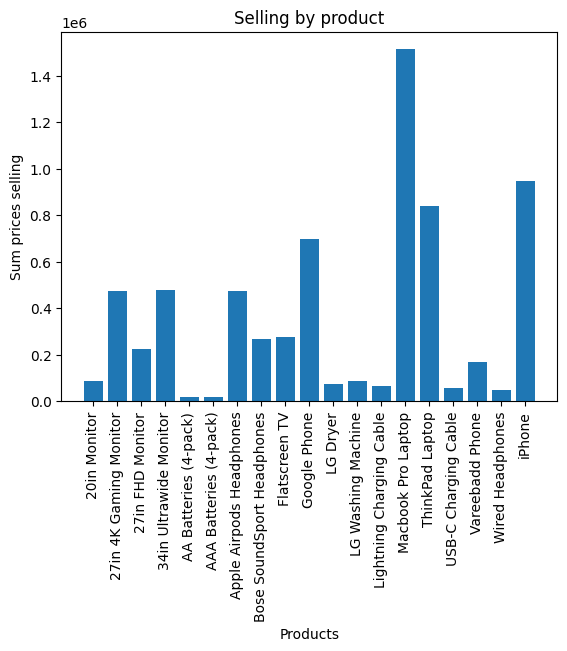

In [53]:
plt.bar(x=temp["Product"], height=temp["Sum"])
plt.xticks(rotation=90)

plt.xlabel('Products')
plt.ylabel('Sum prices selling')
plt.title('Selling by product')

plt.show()


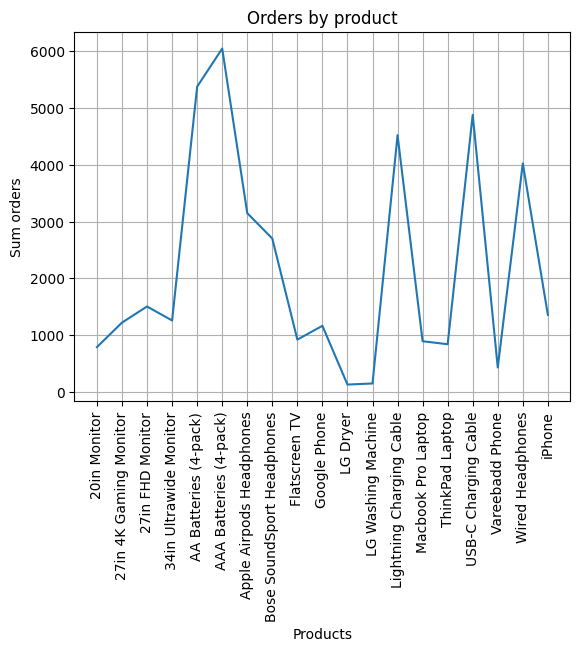

In [38]:
temp = merger_df.groupby("Product")["Quantity Ordered"].sum()

plt.plot(temp.keys(), temp.values)
plt.xticks(rotation=90)
plt.grid(True)

plt.xlabel('Products')
plt.ylabel('Sum orders')
plt.title('Orders by product')

plt.show()

C:\Users\TGDD\AppData\Local\Temp\ipykernel_16892\637261909.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = merger_df.groupby("Product", as_index=False)["Sum", "Quantity Ordered"].sum()
C:\Users\TGDD\AppData\Local\Temp\ipykernel_16892\637261909.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90)


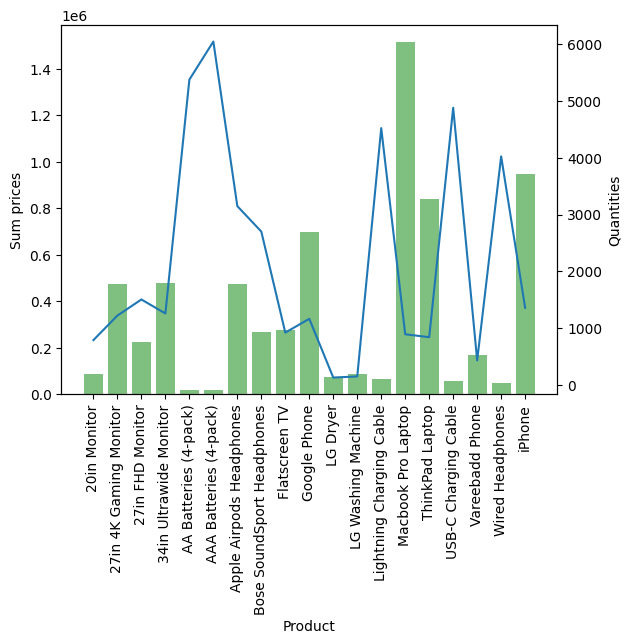

In [56]:
temp = merger_df.groupby("Product", as_index=False)["Sum", "Quantity Ordered"].sum()

x = temp["Product"]
y1 = temp["Sum"]
y2 = temp["Quantity Ordered"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x, y1, alpha=0.5, color='g')
ax2.plot(x, y2)

ax1.set_xticklabels(x, rotation=90)
ax1.set_xlabel("Product")
ax1.set_ylabel("Sum prices")
ax2.set_ylabel("Quantities")

plt.show()

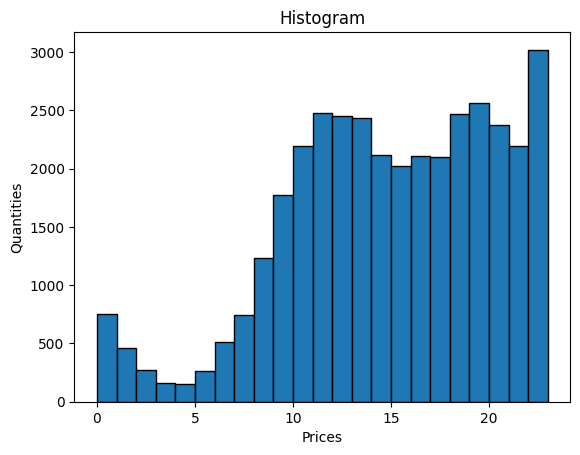

In [61]:
# plt.hist(merger_df["Sum"], bins=10, edgecolor='black')
plt.hist(merger_df["Order Date"].dt.hour, bins=23, edgecolor='black')

plt.xlabel('Prices')
plt.ylabel('Quantities')
plt.title('Histogram')

plt.show()


In [62]:
merger_df["Month"] = merger_df["Order Date"].dt.month
temp = merger_df.groupby("Month")["Quantity Ordered"].sum()
temp


Month
1    10862
2    13449
3    17005
4       19
Name: Quantity Ordered, dtype: int64

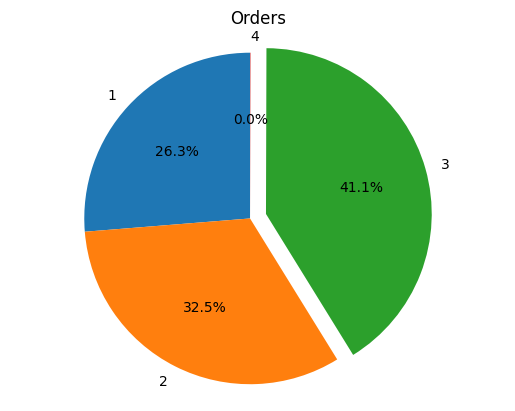

In [63]:
explode = (0, 0, 0.1, 0)
plt.pie(temp.values, explode=explode, labels=temp.keys(), autopct='%1.1f%%', startangle=90)

# plt.pie(temp.values, labels=temp.keys(), autopct='%1.1f%%', startangle=90)


plt.axis('equal')
plt.title('Orders')

plt.show()

In [66]:
# merger_df["Day"] = merger_df["Order Date"].dt.day
# temp = merger_df.groupby("Day")["Quantity Ordered"].sum()
# temp
merger_df["Hour"] = merger_df["Order Date"].dt.hour
temp = merger_df.groupby("Hour")["Quantity Ordered"].sum()
temp

Hour
0      841
1      511
2      318
3      176
4      170
5      294
6      576
7      837
8     1398
9     1988
10    2479
11    2760
12    2738
13    2731
14    2350
15    2251
16    2368
17    2352
18    2796
19    2879
20    2674
21    2454
22    1998
23    1396
Name: Quantity Ordered, dtype: int64

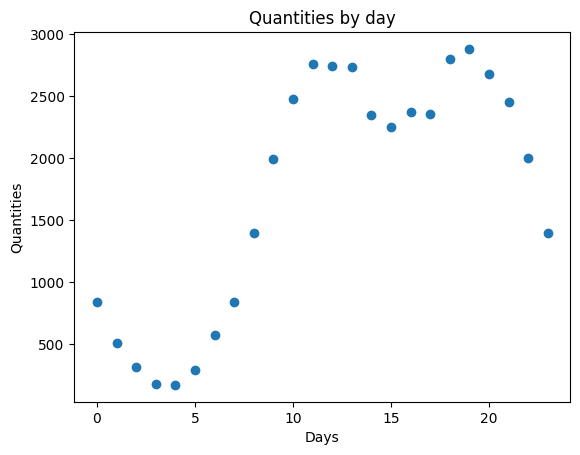

In [67]:
plt.scatter(temp.keys(), temp.values)

plt.xlabel('Days')
plt.ylabel('Quantities')
plt.title('Quantities by day')

plt.show()


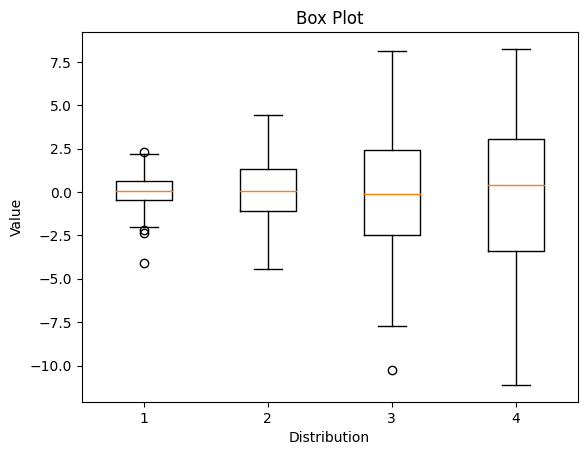

In [45]:
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

plt.boxplot(data)

plt.xlabel('Distribution')
plt.ylabel('Value')
plt.title('Box Plot')

plt.show()



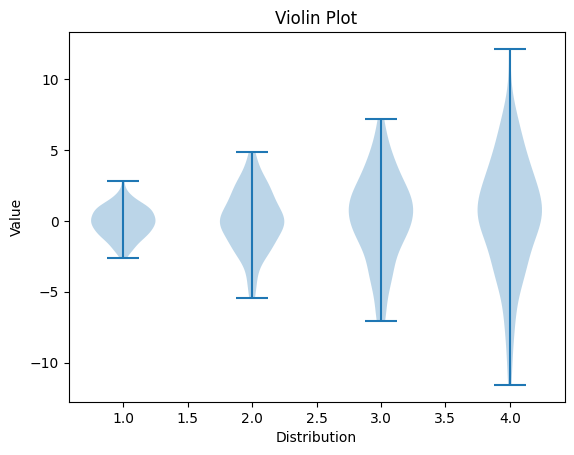

In [46]:
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

plt.violinplot(data)

plt.xlabel('Distribution')
plt.ylabel('Value')
plt.title('Violin Plot')

plt.show()



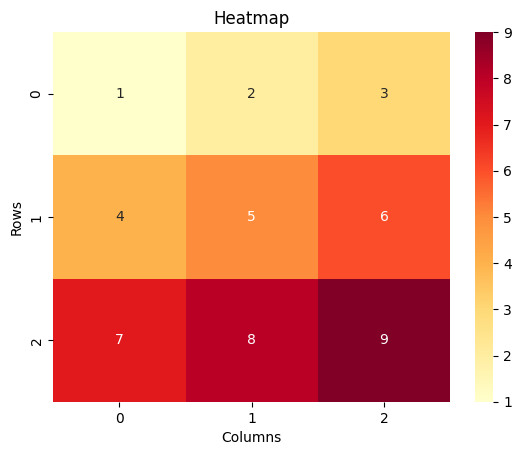

In [47]:
import seaborn as sns

data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

sns.heatmap(data, annot=True, cmap='YlOrRd')

plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap')

plt.show()